In [61]:
# import kagglehub

# path = kagglehub.dataset_download("mohansacharya/graduate-admissions")

# print("Path to dataset files:", path)

In [62]:
import os
path = "/root/.cache/kagglehub/datasets/mohansacharya/graduate-admissions/versions/2"

os.listdir(path)

['Admission_Predict_Ver1.1.csv', 'Admission_Predict.csv']

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim

In [64]:
path = "/root/.cache/kagglehub/datasets/mohansacharya/graduate-admissions/versions/2/Admission_Predict_Ver1.1.csv"

df = pd.read_csv(path)

df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [66]:
df.drop(columns="Serial No.", inplace=True)

In [67]:
X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [69]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [70]:
model = nn.Sequential(
    nn.Linear(7,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,1),
)

lossfun = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.05)

In [71]:
X_tr = torch.tensor(X_train, dtype=torch.float32)
X_te = torch.tensor(X_test,  dtype=torch.float32)

y_tr = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_te = torch.tensor(y_test.values,  dtype=torch.float32).unsqueeze(1)

In [72]:
epochs = 1000
losses = np.zeros(epochs)

for i in range(epochs):
    yHat = model(X_tr)

    loss = lossfun(yHat, y_tr)
    losses[i] = loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    

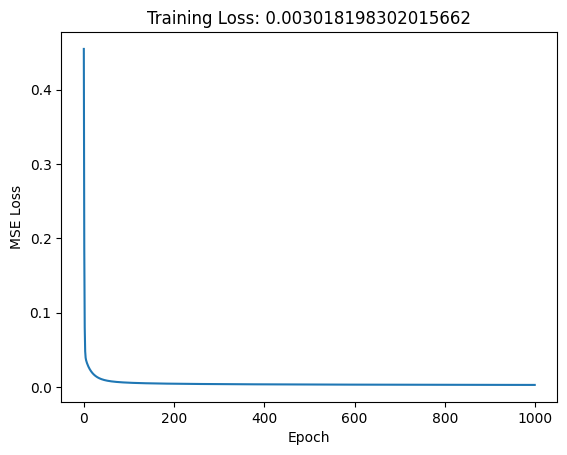

In [73]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title(f"Training Loss: {losses[-1]}")
plt.show()

In [74]:
Test_pred = model(X_tr)

from sklearn.metrics import r2_score
r2_score(y_tr.detach().numpy(), Test_pred.detach().numpy())

0.8518570065498352

In [75]:
model.eval()

with torch.no_grad():
    Test_pred = model(X_te).detach().numpy()

from sklearn.metrics import r2_score

r2_score(y_te, Test_pred)


0.7596385478973389